In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def change_order(theta):
    order = np.argsort(theta[1,:])
    new_theta = np.zeros(theta.shape)
    for i in range(m):
        new_theta[0,i] = theta[0,order[i]]
        new_theta[1,i] = theta[1,order[i]]
    
    return new_theta

In [3]:
from mixture_poisson import poisson_random_param, sample_poisson, poisson_s_bar, poisson_theta_bar
from online_EM import online_EM,online_EM2
from batch_EM import batch_EM
# Parameters
n = 10000  # Size of the data set
m = 3 # Number of clusters
max_l = 50 # Maximum possible value for parameter lambda of Poisson

# Random parameters
l, p = poisson_random_param(m, max_l) # Ground truth

# Manual parameters
l = [1,20,50]
p = [0.4,0.35,0.25]
theta_true = np.array([p, l])

# Data set
Y, W = sample_poisson(n, l, p)

In [4]:
theta_true.shape

(2, 3)

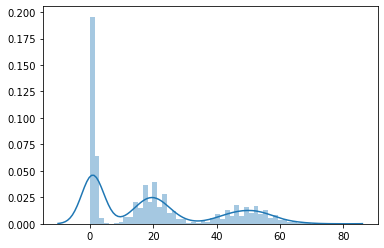

In [5]:
ax = sns.distplot(Y,kde=True,bins=50)

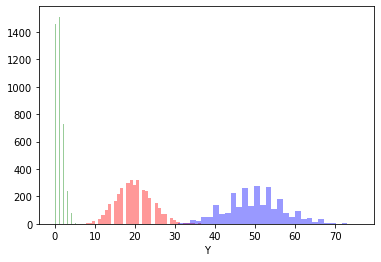

In [6]:
# visualize data set 
data = pd.DataFrame({'Y':Y,'W':W})
colors = ['g','r','b']

for i in range(m):
    ax = sns.distplot(data[data['W']==i]['Y'],kde=False,norm_hist=False,\
                      color = colors[i%len(colors)],label='Group{}'.format(i))

### Online EM [Test 1]
alpha = [1.,0.6]

In [232]:
# Initialization
p_init, l_init = poisson_random_param(m, max_l)
theta_init = np.array([p_init, l_init])
print(f"Initial Theta:\n{theta_init}")

# Stochastic Parameters
gamma_0 = 1
alphas = [1.,0.6]
gamma1 = np.array([gamma_0 * np.power(l, -alphas[0]) for l in range(1, n+1)])
gamma2 = np.array([gamma_0 * np.power(l, -alphas[1]) for l in range(1, n+1)])
#gamma3 = np.array([gamma_0 * np.power(l, -alphas[2]) for l in range(1, n+1)])

Initial Theta:
[[37.96779903 23.35302047  1.68162529]
 [ 0.32884968  0.28940906  0.38174126]]


In [233]:
s_g1, theta_g1, all_theta_g1 = online_EM(Y, theta_init, gamma1, \
                                         poisson_s_bar, poisson_theta_bar, save_iter_theta = True)
s_g2, theta_g2, all_theta_g2 = online_EM(Y, theta_init, gamma2, \
                                         poisson_s_bar, poisson_theta_bar, save_iter_theta = True)
#s_g3, theta_g3, all_theta_g3 = online_EM(Y, theta_init, gamma3, \
                                         #poisson_s_bar, poisson_theta_bar, save_iter_theta = True)
print("\n===============\nFinal results \n===============")
print(f"Truth:\n{theta_true}")
print(f"Online EM with alpha {alphas[0]} after {n} iterations:\n{theta_g1}")
print(f"Online EM with alpha {alphas[1]} after {n} iterations:\n{theta_g2}")
#print(f"Online EM with alpha {alphas[2]} after {n} iterations:\n{theta_g3}")


Final results 
Truth:
[[ 0.4   0.35  0.25]
 [ 1.   20.   50.  ]]
Online EM with alpha 1.0 after 5000 iterations:
[[ 0.44087561  0.24366987  0.31545452]
 [ 2.88308187 50.36051466 21.52633388]]
Online EM with alpha 0.6 after 5000 iterations:
[[ 0.36668111  0.33571807  0.29760083]
 [ 0.94711618 19.83307834 51.31826635]]


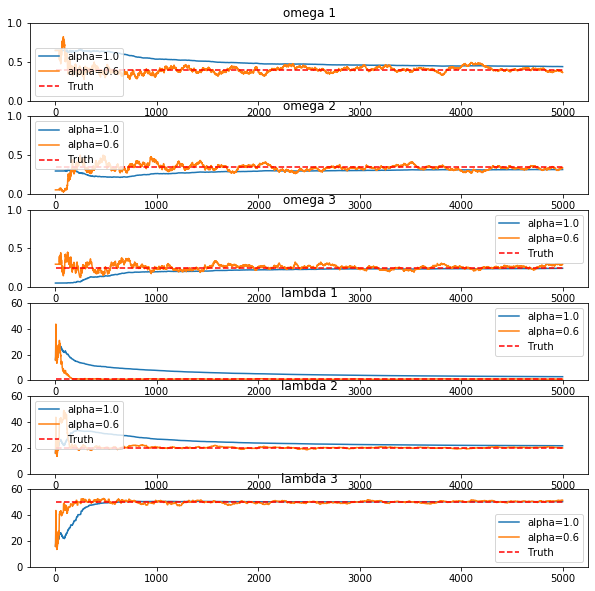

In [240]:
# visualize the process of parameter convergence 
names = ['omega 1','omega 2','omega 3','lambda 1','lambda 2','lambda 3']
truth = change_order(theta_true).reshape((1,-1))[0]

order1 = np.argsort(theta_g1[1,:])
order1 = np.concatenate([order1,order1+3])

order2 = np.argsort(theta_g2[1,:])
order2 = np.concatenate([order2,order2+3])

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(6,1,i+1).set_title(names[i])
    plt.plot(all_theta_g1[1:,order1[i]],label='alpha=1.0')
    plt.plot(all_theta_g2[1:,order2[i]],label='alpha=0.6')
    plt.plot([1,n],[truth[i],truth[i]],'r--',label='Truth')
    if i<3:
        plt.ylim(0.,1.)
    else:
        plt.ylim(0,max_l+10)
    #plt.plot(all_theta_g3[1:,0],label='alpha=0.3')
    plt.legend()

### Online EM [Test 2]
Initialization sensitivity 

In [241]:
num_iter = 100
gamma = np.array([gamma_0 * np.power(l, -1.0) for l in range(1, n+1)])
all_theta =[]
for i in range(num_iter):
    p_init, l_init = poisson_random_param(m, max_l)
    theta_init = np.array([p_init, l_init])
    s, theta = online_EM(Y, theta_init, gamma, poisson_s_bar, poisson_theta_bar)
    #print(theta)
    theta = change_order(theta)
    all_theta.append(theta.reshape(1,-1)[0])


In [242]:
all_theta = np.stack(all_theta,axis=0)
print(all_theta)

[[2.58237906e-09 3.89281609e-01 6.10718388e-01 8.02078090e-01
  1.03504193e+00 3.26338253e+01]
 [3.89572554e-01 2.64748880e-01 3.45678566e-01 1.07714227e+00
  1.91550345e+01 4.29361333e+01]
 [3.86952150e-01 3.53701678e-01 2.59346172e-01 1.01870407e+00
  2.00938721e+01 4.94766278e+01]
 [3.85514530e-01 3.60243090e-01 2.54242380e-01 1.02014254e+00
  1.99779799e+01 5.01206409e+01]
 [3.85739742e-01 2.82433593e-01 3.31826666e-01 1.02066903e+00
  1.94338264e+01 4.35484048e+01]
 [3.86324924e-01 3.60306079e-01 2.53368997e-01 1.01966186e+00
  2.00726607e+01 5.01512721e+01]
 [3.87075297e-01 2.39822855e-01 3.73101848e-01 1.01799770e+00
  1.88475629e+01 4.13262008e+01]
 [3.89002678e-01 3.61018768e-01 2.49978554e-01 1.02288492e+00
  2.04246126e+01 5.02500169e+01]
 [4.54175790e-06 3.88864847e-01 6.11130612e-01 9.71218900e-01
  1.03603796e+00 3.26118778e+01]
 [7.03130386e-01 2.96664659e-01 2.04955685e-04 9.16808138e+00
  4.67738603e+01 5.11921075e+01]
 [3.89909821e-01 3.57596395e-01 2.52493784e-01 1.0

In [243]:
print(np.mean(all_theta,axis=0))
print(np.std(all_theta,axis=0))

[ 0.42273505  0.28335954  0.2939054   2.42277613 20.75553016 46.87174813]
[0.1159159  0.09073125 0.10732504 2.47839576 7.69709181 5.07038617]


[ 0.4   0.35  0.25  1.   20.   50.  ]


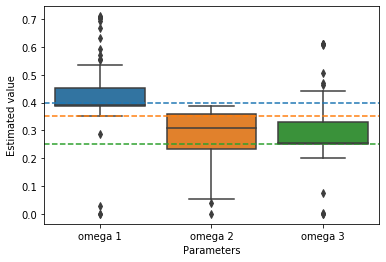

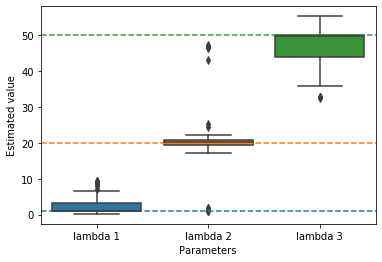

In [244]:
df = pd.DataFrame()
df['Estimated value'] = all_theta.reshape((-1,1))[:,0]
df['Parameters'] = names*num_iter

true_params = change_order(theta_true).reshape((1,-1))[0]
print(true_params)

df_omega =df[df['Parameters'].str.contains('omega')]
df_lambda =df[df['Parameters'].str.contains('lambda')]

plt.figure()
sns.boxplot(x='Parameters',y='Estimated value',data=df_omega)
for i in range(3):
    plt.plot([-0.5,2.5],[true_params[i],true_params[i]],'--')
    
plt.figure()
sns.boxplot(x='Parameters',y='Estimated value',data=df_lambda)
for i in range(3,6):
    plt.plot([-0.5,2.5],[true_params[i],true_params[i]],'--')

## Online EM [Test3]
Compare onlie em with Titterington and batch em

In [8]:
# online em (alpha =1)
num_iter = 100
gamma_0 = 1
alpha = 1.
gamma = np.array([gamma_0 * np.power(l, -alpha) for l in range(1, n+1)])
all_theta_1 =[]

for i in range(num_iter):
    p_init, l_init = poisson_random_param(m, max_l)
    theta_init = np.array([p_init, l_init])
    s, theta = online_EM(Y, theta_init, gamma, poisson_s_bar, poisson_theta_bar)
    #print(theta)
    theta = change_order(theta)
    all_theta_1.append(theta.reshape(1,-1)[0])


In [9]:
# online em (alpha =0.6)
num_iter = 100
gamma_0 = 1
alpha = 0.6
gamma = np.array([gamma_0 * np.power(l, -alpha) for l in range(1, n+1)])
all_theta_06 =[]

for i in range(num_iter):
    p_init, l_init = poisson_random_param(m, max_l)
    theta_init = np.array([p_init, l_init])
    s, theta = online_EM(Y, theta_init, gamma, poisson_s_bar, poisson_theta_bar)
    #print(theta)
    theta = change_order(theta)
    all_theta_06.append(theta.reshape(1,-1)[0])

In [7]:
# online em2 
num_iter = 100
gamma_0 = 1
alpha = 1.
gamma = np.array([gamma_0 * np.power(l, -alpha) for l in range(1, n+1)])
all_theta_2 =[]
p_init, l_init = poisson_random_param(m, max_l)
theta_init = np.array([p_init, l_init])
s, theta = online_EM2(Y, theta_init, gamma)
print(theta)
for i in range(num_iter):
    p_init, l_init = poisson_random_param(m, max_l)
    theta_init = np.array([p_init, l_init])
    s, theta = online_EM2(Y, theta_init, gamma)
    #print(theta)
    theta = change_order(theta)
    all_theta_2.append(theta.reshape(1,-1)[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/Users/yingyu/Desktop/mva/computational stat/projets/Online-EM-Algo/mixture_poisson.py:81: RuntimeWarning: overflow encountered in exp
  w_y_theta = np.array([theta[0, j] * theta[1, j] ** y * np.exp(- theta[1, j]) for j in range(m)])
/Users/yingyu/Desktop/mva/computational stat/projets/Online-EM-Algo/mixture_poisson.py:82: RuntimeWarning: invalid value encountered in true_divide
  w_y_theta /= np.sum(w_y_theta)



2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215

4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233


6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321


8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287


9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9857
9858
9859
9860
9861
9862
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
9873
9874
9875
9876
9877
9878
9879
9880
9881
9882
9883
9884
9885
9886
9887
9888
9889
9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
[nan nan nan]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
7

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457


7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224


8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884


IndexError: too many indices for array

In [10]:
# batch em 
num_iter = 100
gamma_0 = 1
alpha = 1.
gamma = np.array([gamma_0 * np.power(l, -alpha) for l in range(1, n+1)])
all_theta_batch =[]

max_iteration =5
for i in range(num_iter):
    p_init, l_init = poisson_random_param(m, max_l)
    theta_init = np.array([p_init, l_init])
    theta = batch_EM(Y, theta_init,max_iter = max_iteration)
    #print(theta)
    theta = change_order(theta)
    all_theta_batch.append(theta.reshape(1,-1)[0])

In [11]:
all_theta_1 = np.stack(all_theta_1,axis=0)
print(all_theta_1.shape)
all_theta_06 = np.stack(all_theta_06,axis=0)
all_theta_batch = np.stack(all_theta_batch,axis=0)

(100, 6)


In [12]:
true_params = change_order(theta_true).reshape((1,-1))[0]
print(true_params)

[ 0.4   0.35  0.25  1.   20.   50.  ]


In [14]:
all_theta =np.concatenate([all_theta_1,all_theta_06,all_theta_batch],axis=0)
print(all_theta.shape)

(300, 6)


In [20]:
methods = ['OL1']*num_iter + ['OL06']*num_iter +['EM5']*num_iter
params = ['Omega 1','Omega 2','Omega 3','Lambda 1','Lambda 2','Lambda 3']

In [21]:
df = pd.DataFrame(all_theta,columns=params)
df['Methods'] = methods

In [22]:
print(df)

      Omega 1   Omega 2   Omega 3  Lambda 1   Lambda 2   Lambda 3 Methods
0    0.399154  0.316752  0.284094  1.008370  19.479012  46.810927     OL1
1    0.400001  0.271172  0.328826  1.012950  19.093931  43.452354     OL1
2    0.419349  0.329322  0.251328  1.672904  20.064523  49.982295     OL1
3    0.398661  0.205180  0.396160  1.008358  18.431996  39.598527     OL1
4    0.398646  0.270997  0.330357  1.007882  19.062330  43.297335     OL1
..        ...       ...       ...       ...        ...        ...     ...
295  0.167978  0.237512  0.594509  0.607628   1.354497  32.711720     EM5
296  0.403571  0.342699  0.253729  1.008239  19.856841  49.893245     EM5
297  0.403587  0.344152  0.252260  1.008430  19.909586  49.997114     EM5
298  0.367227  0.037542  0.595231  1.016455   1.160095  32.683738     EM5
299  0.403588  0.344169  0.252243  1.008433  19.910244  49.998287     EM5

[300 rows x 7 columns]


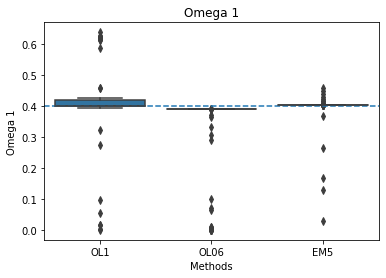

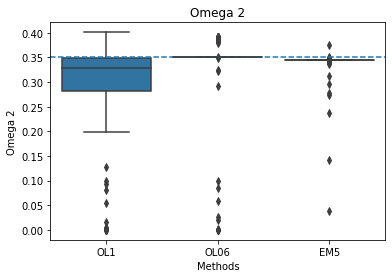

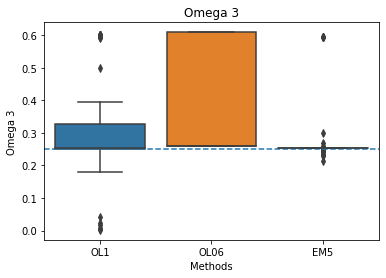

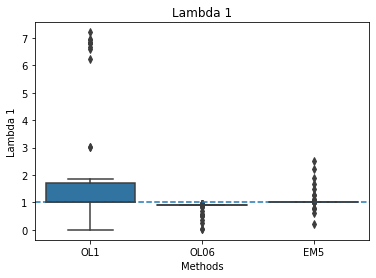

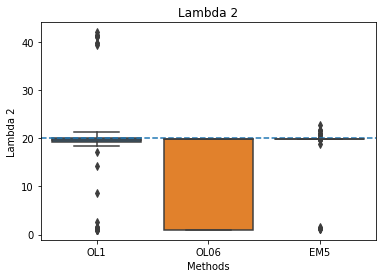

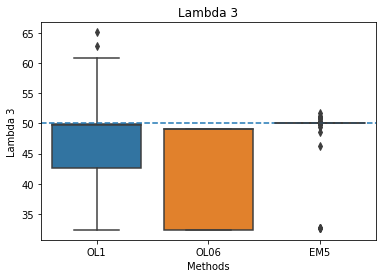

In [27]:
count = 0 

for param in params:
    plt.figure()
    sns.boxplot(x='Methods',y=param,data=df)
    plt.plot([-0.5,2.5],[true_params[count],true_params[count]],'--')
    plt.title(param)
    #if count<3:
        #plt.ylim(0.,1.)
    #else:
        #plt.ylim(0,max_l+10)
    count+=1
    
    